In [31]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#load the data matrics
matrix_2st=np.loadtxt('right2st.txt')
print('2 state scenario matrics has the shape:',matrix_2st.shape)
matrix_2st[15]

2 state scenario matrics has the shape: (6312, 14)


array([1., 2., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 2.])

In [33]:
str1 = ",".join(str(i) for i in matrix_2st)
str1 = str1.split(",")
str1

['[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]',
 '[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]',
 '[1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]',
 '[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]',
 '[1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 0. 2. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1

# Wight with [231121]

In [34]:
weight = [2,3,1,1,2,1,2,3,1,1,2,1]

In [35]:
matrix1 = matrix_2st[:,2:]
matrix1.shape

(6312, 12)

In [36]:
matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 7.,  0.,  7., ...,  0.,  3., 12.],
       [ 0.,  0., 16., ...,  0., 11.,  5.],
       [ 0.,  0., 16., ...,  0., 12.,  5.]])

In [37]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
matrix1st[:,6]*=weight[6]
matrix1st[:,7]*=weight[7]
matrix1st[:,8]*=weight[8]
matrix1st[:,9]*=weight[9]
matrix1st[:,10]*=weight[10]
matrix1st[:,11]*=weight[11]
kmeans1 = KMeans(n_clusters=4).fit(matrix1st)
print(len(np.unique(kmeans1.labels_)))
print(kmeans1.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

4
[2 2 2 ... 1 2 2]


In [68]:
#evaluation for each 
from sklearn import metrics
from sklearn.metrics import pairwise_distances
ch1={}
ch2={}
ch3={}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(matrix1st)
    labels = kmeans.labels_
    ch1[k] = metrics.calinski_harabasz_score(matrix1st,labels)
    ch2[k] = metrics.davies_bouldin_score(matrix1st,labels)
    ch3[k] = metrics.silhouette_score(matrix1st,labels)
    print(k, ch1[k])
    print(k, ch2[k])
    print(k, ch3[k])

2 4148.068815795954
2 1.0226511389272543
2 0.4748183147370293
3 5004.769562286831
3 0.8579594805485552
3 0.5175401115863817
4 5261.176520925527
4 0.6925403014305063
4 0.5703527898434194
5 4992.644210299684
5 1.0186859785422233
5 0.3520016099334616
6 4741.260702887015
6 1.0637256824886727
6 0.3556000167008508
7 4563.433458505792
7 0.9998781740732949
7 0.3638936063028339
8 4325.773573102635
8 1.0938325651635654
8 0.3293873116328686
9 4086.9377894013223
9 1.1597600299086706
9 0.30338766931177336
10 3927.713837484442
10 1.158326312895498
10 0.29513962063305627
11 3786.9995938069105
11 1.2134997366857705
11 0.27779832800552745
12 3632.358590345721
12 1.2510889178838027
12 0.26484996760418045
13 3509.2821662851343
13 1.2757736523122531
13 0.2583442315241426
14 3397.742778111958
14 1.2482781032169599
14 0.2546455948589138
15 3271.051559001215
15 1.2687083162323876
15 0.2508948184060341
16 3167.1257386322045
16 1.285758833211517
16 0.24241828992836012
17 3109.281997163898
17 1.2855843989026439

In [32]:
def plot_embedding(X, y, label,title=None):

    plt.figure(figsize=(20, 20))
    ax = plt.subplot(111)
    plt.scatter(X[:,0], X[:,1], c = label)
    for i in range(int(len(X)/200)):   
        plt.text(X[200*i, 0], X[200*i, 1], y[200*i],
                 fontsize=15)
 #plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [33]:
from matplotlib import offsetbox
from sklearn.manifold import TSNE




# plot
# plt.figure(figsize=(20, 20))
# plt.scatter(X1[:, 0], X1[:, 1], c = kmeans1.labels_)
# plt.show()

In [34]:
tsne = TSNE(n_components = 2)
X1 = tsne.fit_transform(matrix1st)

In [35]:
str1

['[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]',
 '[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]',
 '[1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]',
 '[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]',
 '[1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 0. 2. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1

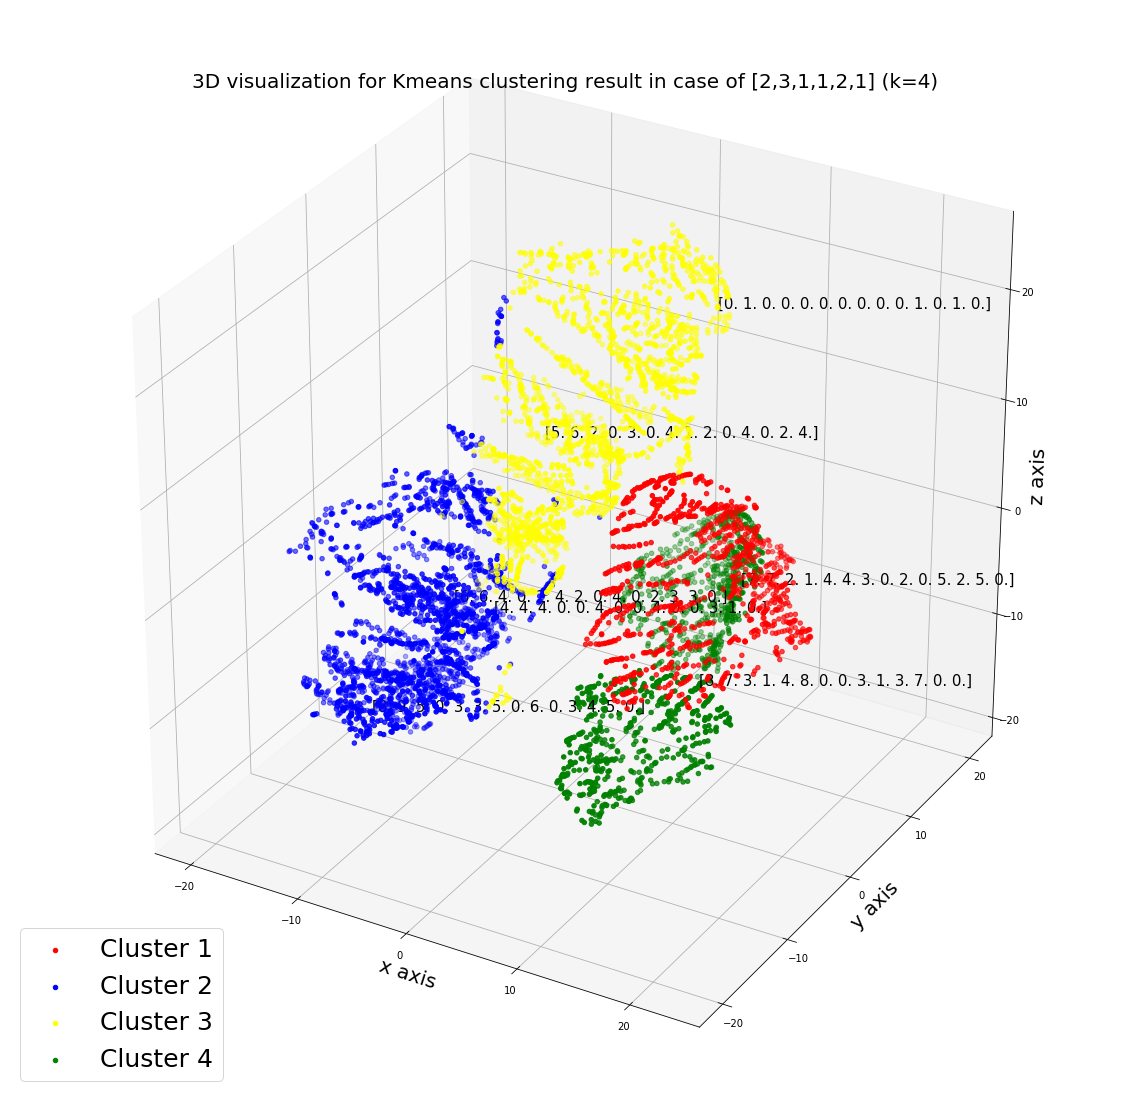

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
x5 = [] 
y5 = []
z5 = []
pred5 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(kmeans1.labels_[i])
for i in range(len(data[:,0])):
    if kmeans1.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(kmeans1.labels_[i])
    if kmeans1.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(kmeans1.labels_[i])
    if kmeans1.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(kmeans1.labels_[i])
    if kmeans1.labels_[i] == 3:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(kmeans1.labels_[i])
    else:
        x5.append(data[i,0])
        y5.append(data[i,1])
        z5.append(data[i,2])
        pred5.append(kmeans1.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
for i in range(int(len(data)/800)):
    ax.text(x[800*i], y[800*i], z[800*i],str1[800*i],
             fontsize=15)
plt.title("3D visualization for Kmeans clustering result in case of [2,3,1,1,2,1] (k=4)",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()

# Weight with [111111]

In [40]:
weight = [1,1,1,1,1,1,1,1,1,1,1,1]

In [41]:
matrix1 = matrix_2st[:,1:]
matrix1.shape

(6312, 13)

In [42]:
matrixst1 = matrix1

matrixst1

array([[ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [15.,  7.,  0., ...,  0.,  3., 12.],
       [16.,  0.,  0., ...,  0., 11.,  5.],
       [17.,  0.,  0., ...,  0., 12.,  5.]])

In [43]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
matrix1st[:,6]*=weight[6]
matrix1st[:,7]*=weight[7]
matrix1st[:,8]*=weight[8]
matrix1st[:,9]*=weight[9]
matrix1st[:,10]*=weight[10]
matrix1st[:,11]*=weight[11]
kmeans2 = KMeans(n_clusters=2).fit(matrix1st)
print(len(np.unique(kmeans2.labels_)))
print(kmeans1.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

2
[2 2 2 ... 1 2 2]


In [74]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
ch1={}
ch2={}
ch3={}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(matrix1st)
    labels = kmeans.labels_
    ch1[k] = metrics.calinski_harabasz_score(matrix1st,labels)
    ch2[k] = metrics.davies_bouldin_score(matrix1st,labels)
    ch3[k] = metrics.silhouette_score(matrix1st,labels)
    print(k, ch1[k])
    print(k, ch2[k])
    print(k, ch3[k])

2 1694.960221584932
2 1.7474089039655452
2 0.21002793785562093
3 1591.2421519088407
3 1.6997990269456427
3 0.19646696160970037
4 1563.3653140221118
4 1.4979360733475473
4 0.20289605439214017
5 1411.6737739334499
5 1.4674979059265518
5 0.20657481349548001
6 1296.0517786066907
6 1.432965810620754
6 0.19343677124262826
7 1222.0208792562294
7 1.4774725732732346
7 0.1989152183087793
8 1156.8895044162473
8 1.45364828784923
8 0.2024188002295541
9 1101.9136576819412
9 1.4749696313333922
9 0.18768331932789256
10 1057.9232138548887
10 1.4643704657479426
10 0.19519972830986462
11 1015.5428107798598
11 1.4474793629166183
11 0.18230101922377642
12 991.5664040114609
12 1.3999144832212975
12 0.19343570977387564
13 970.1187763588374
13 1.3817387368371674
13 0.2023468682194008
14 944.9332871149371
14 1.4196522450814038
14 0.19107437585477013
15 924.3138313327687
15 1.3577323343572898
15 0.2023273979898194
16 903.1290906031137
16 1.3163456776982414
16 0.20038916679277374
17 890.9662249706495
17 1.325002

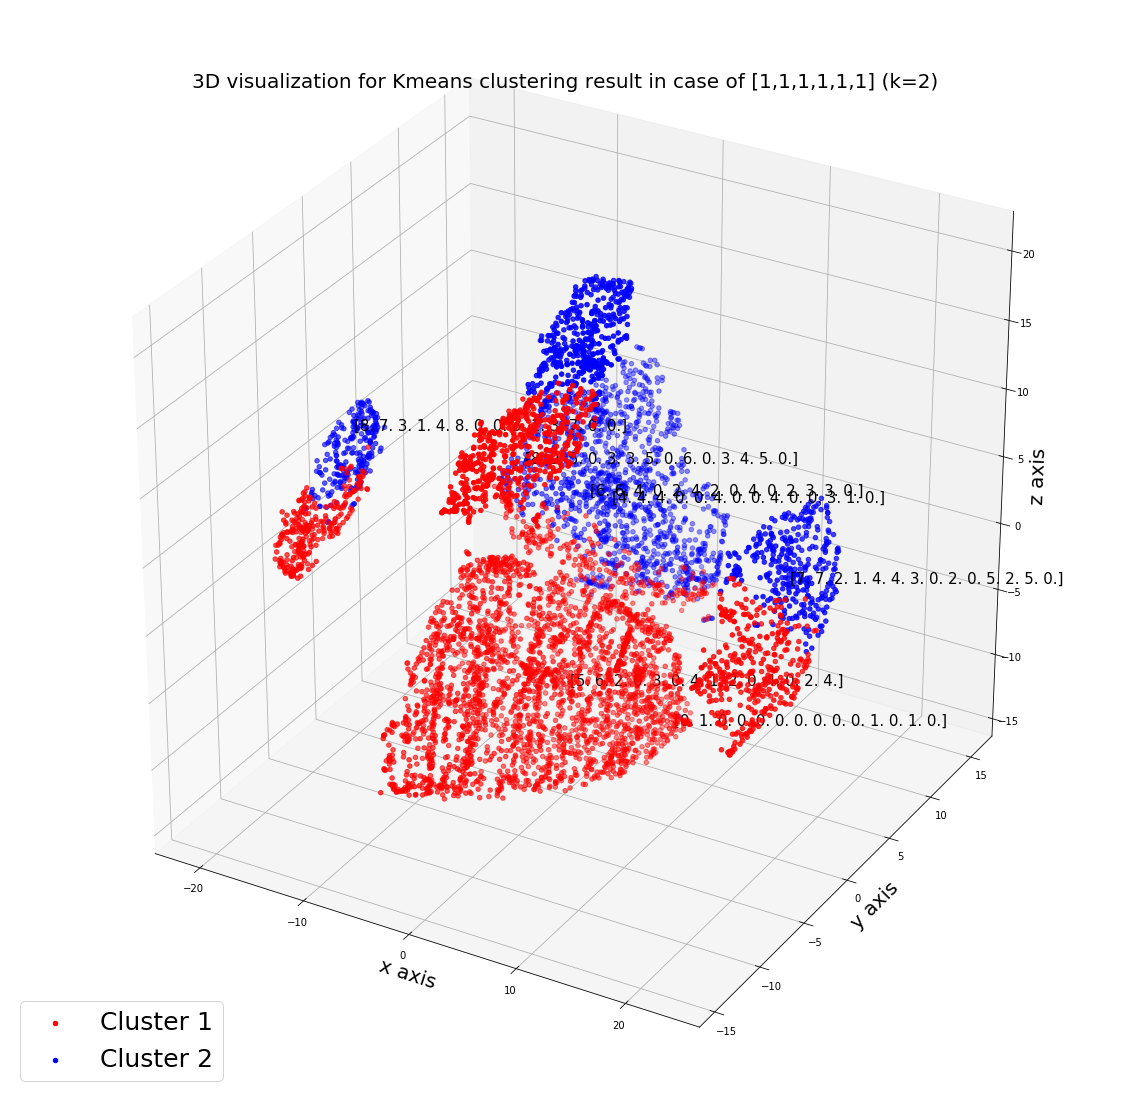

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(kmeans2.labels_[i])
for i in range(len(data[:,0])):
    if kmeans2.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(kmeans2.labels_[i])
    if kmeans2.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(kmeans2.labels_[i])
    if kmeans2.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(kmeans2.labels_[i])
    else:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(kmeans2.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
# ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
# ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
for i in range(int(len(data)/800)):
    ax.text(x[800*i], y[800*i], z[800*i],str1[800*i],
             fontsize=15)
plt.title("3D visualization for Kmeans clustering result in case of [1,1,1,1,1,1] (k=2)",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()

# Weight[131111]

In [45]:
weight = [1,3,1,1,1,1,1,3,1,1,1,1]

In [46]:
matrix1 = matrix_2st[:,1:]
matrix1.shape

(6312, 13)

In [47]:
matrixst1 = matrix1

matrixst1

array([[ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [15.,  7.,  0., ...,  0.,  3., 12.],
       [16.,  0.,  0., ...,  0., 11.,  5.],
       [17.,  0.,  0., ...,  0., 12.,  5.]])

In [48]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
matrix1st[:,6]*=weight[6]
matrix1st[:,7]*=weight[7]
matrix1st[:,8]*=weight[8]
matrix1st[:,9]*=weight[9]
matrix1st[:,10]*=weight[10]
matrix1st[:,11]*=weight[11]
kmeans3 = KMeans(n_clusters=2).fit(matrix1st)
print(len(np.unique(kmeans3.labels_)))
print(kmeans3.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

2
[1 1 1 ... 0 1 1]


In [79]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
ch1={}
ch2={}
ch3={}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k).fit(matrix1st)
    labels = kmeans.labels_
    ch1[k] = metrics.calinski_harabasz_score(matrix1st,labels)
    ch2[k] = metrics.davies_bouldin_score(matrix1st,labels)
    ch3[k] = metrics.silhouette_score(matrix1st,labels)
    print(k, ch1[k])
    print(k, ch2[k])
    print(k, ch3[k])

2 4720.954870690651
2 1.0663120345484625
2 0.3436286718889355
3 3684.1891218296737
3 1.3793680423283428
3 0.2520747444188902
4 3022.9231737128607
4 1.4398016649434984
4 0.230826940912339
5 2669.8039091977953
5 1.497662472854259
5 0.20289890133229668
6 2395.2958637031975
6 1.5471416292403184
6 0.19690547930863
7 2191.589017974824
7 1.5397120401428768
7 0.19411659604430503
8 2017.0382967070434
8 1.5191570956190268
8 0.1815511849921919
9 1875.2756068183742
9 1.5166991779631667
9 0.17406044151052957
10 1766.2650425838785
10 1.5659872375682908
10 0.16711739921615942
11 1661.8876787365948
11 1.564843552363313
11 0.1718445575731243
12 1592.188504523417
12 1.5557827011435899
12 0.15871743367489627
13 1502.873219415919
13 1.621475321838847
13 0.16619699021035625
14 1455.886279887033
14 1.543089870622596
14 0.16747353501676482
15 1399.6864923134247
15 1.5452507284234611
15 0.16812731073964518
16 1347.1998799880644
16 1.5176849598875803
16 0.17400590293504575
17 1312.9033272991117
17 1.5935657070

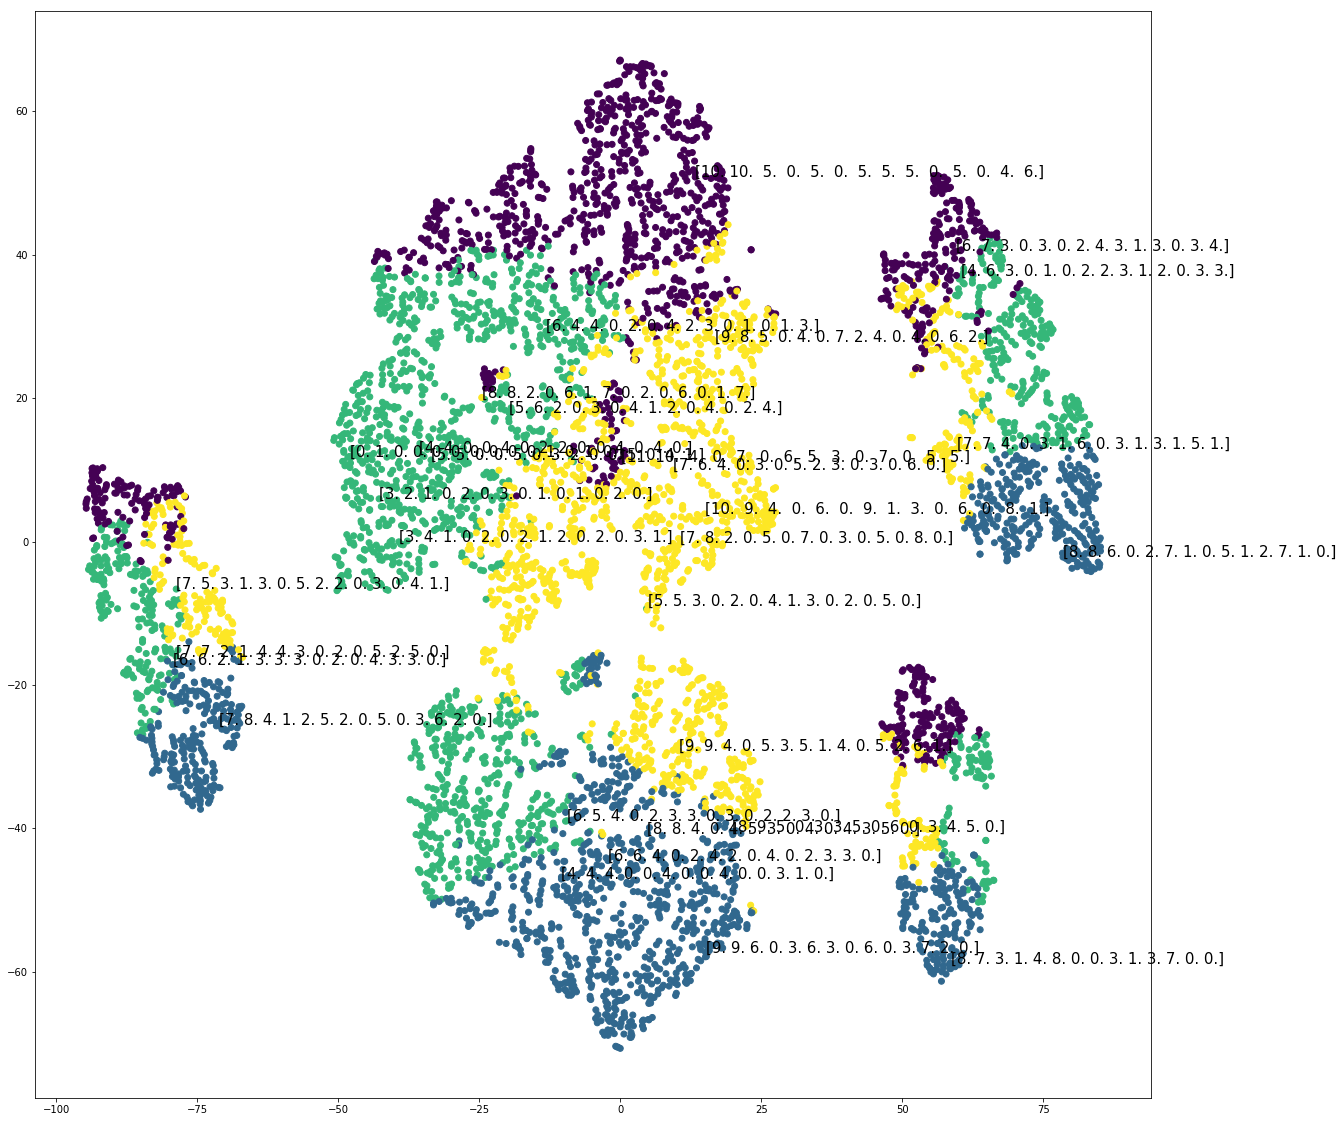

In [51]:
tsne = TSNE(n_components = 2)
X1 = tsne.fit_transform(matrix1st)
plot_embedding(X1,str1,kmeans3.labels_)

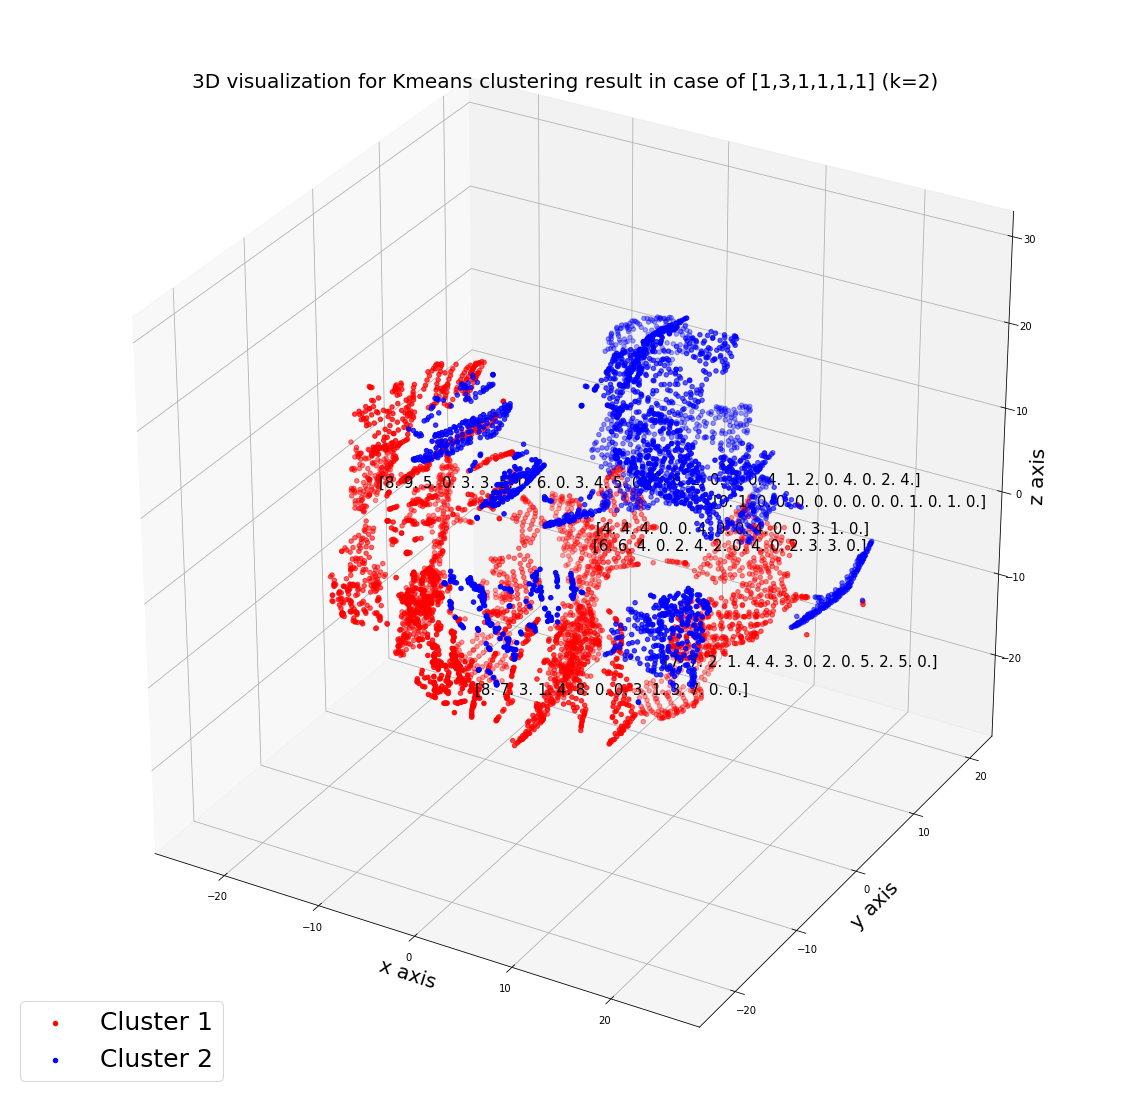

In [49]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(kmeans3.labels_[i])
for i in range(len(data[:,0])):
    if kmeans3.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(kmeans3.labels_[i])
    if kmeans3.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(kmeans3.labels_[i])
    if kmeans3.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(kmeans3.labels_[i])
    else:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(kmeans3.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
# ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
# ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
for i in range(int(len(data)/800)):
    ax.text(x[800*i], y[800*i], z[800*i],str1[800*i],
             fontsize=15)
plt.title("3D visualization for Kmeans clustering result in case of [1,3,1,1,1,1] (k=2)",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()